# Banking Domain - Marketing Targets - Analysis and Predictions

**The use of Robot Process Automation (RPA) technology seems to be the most straightforward answer, especially since the technology has become a universal enabler in banks these days. RPA is best described as a business process tool to automate manual, intensive, repetitive and rule-based tasks.
RPA in finance can be defined as the use of robotic applications to augment (or replace) human efforts in the financial sector. RPA helps banks and accounting departments automate repetitive manual processes, allowing the employees to focus on more critical tasks and the firm to gain a competitive advantage. Branch automation allows for centralized customer service that can easily pull customer records from any bank branch. Due to ease of record retrieval, other tasks are also made more efficient, such as new account or loan applications and some teller services.**



![](https://kissflow.com/wp-content/uploads/2019/02/manual-process-vs-automation-process.png)

# Importing Neccesary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

# LOADING THE DATASET

In [2]:
#Reading training and testing data as dataframes
train_df = pd.read_csv("/kaggle/input/banking-dataset-marketing-targets/train.csv",sep =";")
test_df = pd.read_csv("/kaggle/input/banking-dataset-marketing-targets/test.csv", sep =";")
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Profiling

In [3]:
#Dimensions of dataset
train_df.shape

(45211, 17)

In [4]:
#Information about the data types of features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Statistical summary of training dataset
train_df.describe(include ='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
#Checking if there are any missing values
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
train_df.value_counts()

age  job         marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
95   retired     married   secondary  no       0        no       no    telephone  1    oct    215       1         -1     0         unknown   no     1
34   unknown     married   unknown    no       4535     no       no    cellular   6    aug    54        3         -1     0         unknown   no     1
35   admin.      married   secondary  no       126      yes      no    cellular   8    apr    268       1         -1     0         unknown   no     1
                                               122      yes      no    cellular   18   nov    51        4         -1     0         unknown   no     1
                                               100      yes      no    cellular   14   may    171       4         -1     0         unknown   no     1
                                                                                                         

In [8]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Exploratory Data Analysis

Text(0.5, 1.0, 'Education type vs Count')

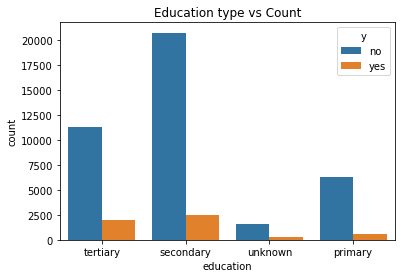

In [9]:
sns.countplot(x="education",data=train_df, hue = "y")
plt.title("Education type vs Count")

**More people with higher education degrees will be subscribed and preferred in the banking domain in future. Proportional relationship. More secondary profiles means more term deposit will be sold.**


Text(0.5, 1.0, 'Martial Status vs Count')

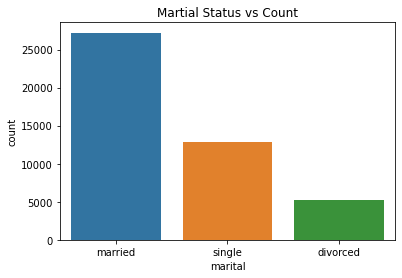

In [10]:
sns.countplot(x="marital", data = train_df)
plt.title("Martial Status vs Count")

**The bank will be interested more in married people and single than divorced people. The three variables are presented in descending order. Direct relation of samples wrt. the target column. The most "married" samples meant more subscribers.
It seems that married people would invest more in the banking domain than the single or divorced people in the upcoming time.**



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

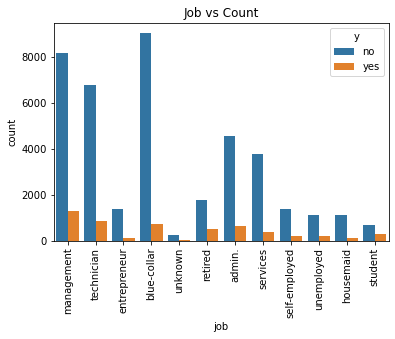

In [11]:
sns.countplot(x="job", data = train_df, hue ="y")
plt.title("Job vs Count")
plt.xticks(rotation=90)

**The bank would contact more on people with professional profiles. Most of the term deposit takers have a high qualification with regards to others. In the upcoming time mostly working pople who are in the management peoples would be interested in investing their money in banking domain.**


Text(0.5, 1.0, 'personal loan vs Count')

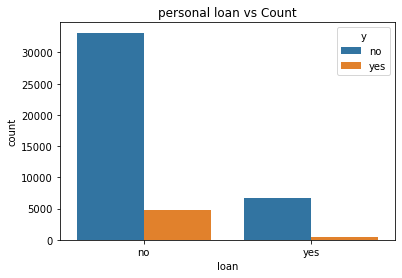

In [12]:
sns.countplot(x="loan", data = train_df, hue ="y")
plt.title("personal loan vs Count")

**People facing heavy loans would not be interested in future for the banking deposits where the automation can take place which would benefit the both banking employee and common people. Jobs like passbook updating, cash deposit, verification of know-your-customer details, salary uploads can be done with the help of artifical intelligence pushing the boundaries of technology by implementing robotics to centralise operations and for quicker turnarounds in things like loan processing and selling financial products to customers. This is reducing the need for a manual worker at the back end.**





Text(0.5, 1.0, 'housing loan vs Count')

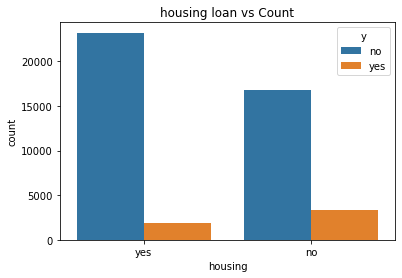

In [13]:
sns.countplot(x="housing", data = train_df, hue ="y")
plt.title("housing loan vs Count")

**There are more people with a housing loan. People without a housing loan are in higher proportion decided to got subscribed to a term deposit. Inverse proportion relationship. Today many passbooks and automated banking machines have taken place of the home to home delivery which can significantly reduce the manual task by 37 % and would increase upto 50 % in future.**



Text(0.5, 1.0, 'Contact vs Count')

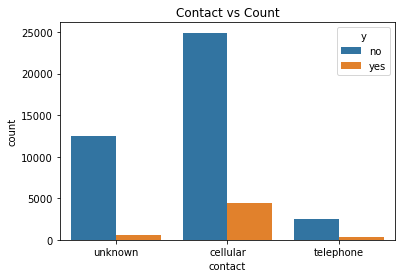

In [14]:
sns.countplot(x="contact", data = train_df, hue ="y")
plt.title("Contact vs Count")

**India is experiencing what banks in advanced countries have been doing for the past many years. Barclays chairman Anthony Jenkins warned of the Uber moment for banks a few years ago, and that is coming true.**




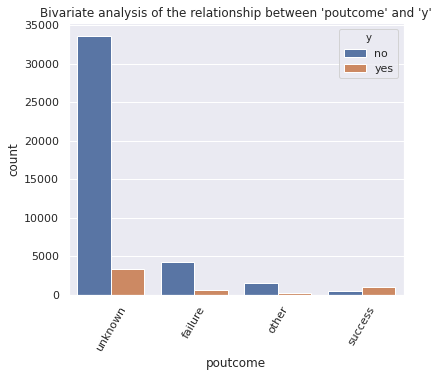

In [15]:
sns.set_style(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
poutcome = sns.countplot(x="poutcome", data = train_df, hue = "y", order = train_df["poutcome"].value_counts().index)
poutcome.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'poutcome' and 'y'")
plt.show()


**The Indian banking industry has been witnessing a slow transition from people-driven to machines controlled in the past few years. The technological development, which has made banking easier, has also led to a slowdown in the hiring of staff at banks. Although there have been hirings, the nature of skill sets required is changing with a lot more focus on the front end talent and more and more banking domain tasks can be through automated machine which would reduce the manual task and convert most of the work into digitalisation.**



![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqJhSNp6UfPhVwKh5BVzIn19VcfxExitu-EQ&usqp=CAU)

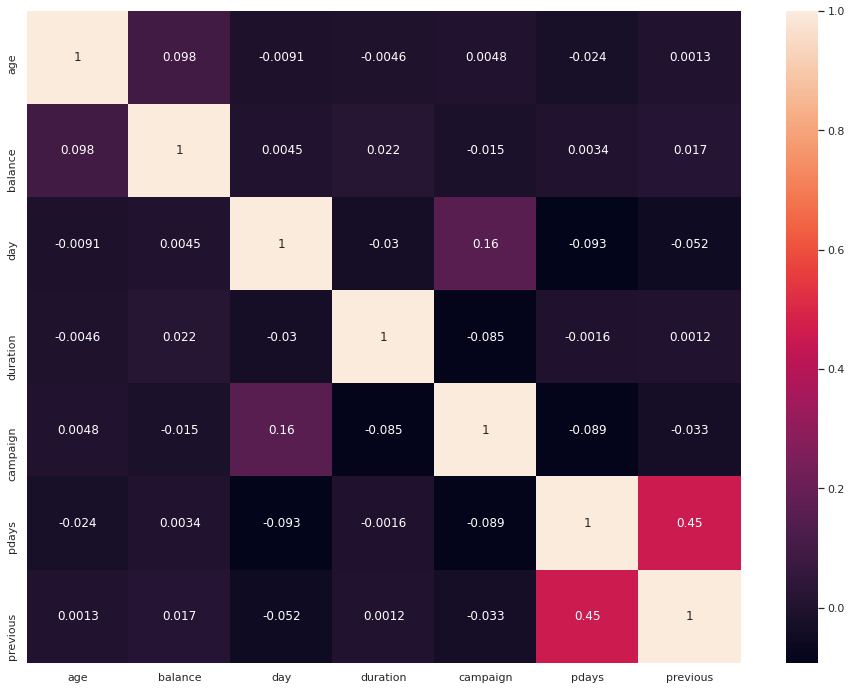

In [16]:
plt.figure(figsize=(16,12))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot =True)


**There is no multicollinearity between independent variables.**

# Feature Encoding

In [17]:
#Combining training and testing data for the purpose of encoding
df = pd.concat([train_df,test_df], ignore_index=True)
df.shape

(49732, 17)

In [18]:
df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1


In [19]:
df['y'].replace('yes', 1, inplace=True)
df['y'].replace('no', 0, inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [20]:
#from sklearn.preprocessing import MinMaxScaler
target = df['y']
df = df.drop('y',axis = 1)
columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=[columns])
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
y = np.array(target)
X = df

#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 20)

# Model Building

[](https://miro.medium.com/max/2000/1*q7popEzTvIQgwbw71MSjzQ.png)

# 1. Logistic Regression

In [22]:
#Initializing and fitting the logistic regression model
lr_model = LogisticRegression(max_iter=125)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)*100

89.93002493364433

**The accuracy of the logistic regression model is 90%**

**Lets try with Support Vector Machine**

# 2. SVM

In [24]:
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10938
           1       0.66      0.19      0.30      1495

    accuracy                           0.89     12433
   macro avg       0.78      0.59      0.62     12433
weighted avg       0.87      0.89      0.86     12433



In [26]:
accuracy_score(y_test, y_pred_svc)

0.8907745515965575

# 3. DECISION TREE CLASSIFIER

In [27]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10938
           1       0.66      0.33      0.44      1495

    accuracy                           0.90     12433
   macro avg       0.79      0.65      0.69     12433
weighted avg       0.88      0.90      0.88     12433



In [29]:
print(confusion_matrix(y_test,y_pred))

[[10686   252]
 [ 1000   495]]


In [30]:
DecisionTreeClassifierScore=dtree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)



Accuracy obtained by Decision Tree Classifier model: 89.94611115579507


# 4. Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10938
           1       0.66      0.33      0.44      1495

    accuracy                           0.90     12433
   macro avg       0.79      0.65      0.69     12433
weighted avg       0.88      0.90      0.88     12433



In [33]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)


Accuracy obtained by Random Forest Classifier model: 91.96493203571141


# 5. Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [35]:
print(confusion_matrix(y_test,y_pred))

[[10686   252]
 [ 1000   495]]


In [36]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)


Accuracy obtained by Gradient Boosting Classifier model: 90.61368937505027


# 6. CatBoost Classifier

In [37]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);


Learning rate set to 0.5
0:	learn: 0.3385600	total: 70.4ms	remaining: 633ms
1:	learn: 0.2583955	total: 84.4ms	remaining: 338ms
2:	learn: 0.2402876	total: 97.6ms	remaining: 228ms
3:	learn: 0.2343105	total: 110ms	remaining: 165ms
4:	learn: 0.2265305	total: 125ms	remaining: 125ms
5:	learn: 0.2191225	total: 137ms	remaining: 91.5ms
6:	learn: 0.2158382	total: 151ms	remaining: 64.9ms
7:	learn: 0.2141248	total: 165ms	remaining: 41.3ms
8:	learn: 0.2122536	total: 178ms	remaining: 19.8ms
9:	learn: 0.2077817	total: 194ms	remaining: 0us


In [38]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10938
           1       0.66      0.19      0.30      1495

    accuracy                           0.89     12433
   macro avg       0.78      0.59      0.62     12433
weighted avg       0.87      0.89      0.86     12433



In [39]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)


Accuracy obtained by CatBoost Classifier model: 90.541301375372


In [40]:
y_pred=cat.predict(X_test)
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
12428,0,0
12429,0,0
12430,0,0
12431,0,0


**CONCLUSION :**

**We got a good accuracy score of about 91.96 % using Random Forest Classifier and 90.6 % using Gradient Boosting Classifier.**

**Thank you**